<a href="https://colab.research.google.com/github/pranshumittal08/Projects/blob/master/Geely_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as pe
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [558]:
#Uploading local file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv
User uploaded file "CarPrice_Assignment.csv" with length 26717 bytes


In [0]:
#Reading the CSV file
import io
data = pd.read_csv(io.StringIO(uploaded['CarPrice_Assignment.csv'].decode('UTF-8')))


In [560]:
#Creating a DataFrame for the CarPrice data
carprice_df = pd.DataFrame(data)
carprice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [561]:
carprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Preprocessing

In [562]:
#Splitting the carName column into Company and Model name
car_name_df = carprice_df.CarName.str.split(n = 1, expand = True)
carprice_df.insert(loc = 2,column = "car_name", value = car_name_df[1])
carprice_df.insert(loc = 2,column = "car_company", value = car_name_df[0])
carprice_df.drop(columns = "CarName", inplace = True)
carprice_df.head()

,car_ID,symboling,car_company,car_name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [563]:
carprice_df.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [564]:
#Removing error from names of car companies
carprice_df.car_company.replace(to_replace = ["Nissan","porcshce", "toyouta","maxda", "vokswagen", "vw"], value = ["nissan", "porsche","toyota","mazda", "volkswagen","volkswagen"], inplace = True)
carprice_df.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [565]:
print("Fuel Types---", carprice_df.fueltype.unique())
print("aspiration---", carprice_df.aspiration.unique())
print("doornumber---", carprice_df.doornumber.unique())
print("carbody---", carprice_df.carbody.unique())
print("Drivewheel---", carprice_df.drivewheel.unique())
print("Engine Location---", carprice_df.enginelocation.unique())
print("Engine Type---", carprice_df.enginetype.unique())
print("Cylinder Number---", carprice_df.cylindernumber.unique())
print("Fuel System---", carprice_df.fuelsystem.unique())

Fuel Types--- ['gas' 'diesel']
aspiration--- ['std' 'turbo']
doornumber--- ['two' 'four']
carbody--- ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Drivewheel--- ['rwd' 'fwd' '4wd']
Engine Location--- ['front' 'rear']
Engine Type--- ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Cylinder Number--- ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Fuel System--- ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


So there are no errors in remaining object or categorical columns

In [566]:
#Checking the numeric columns or features
carprice_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


All the numeric values seem to be okay for the analysis i.e. there are no extreme or error values.

## Exploratory Data Analysis

In [567]:
fig = make_subplots(rows =2, cols = 2 )
fig.add_trace(go.Box(x = carprice_df["car_company"], y = carprice_df["price"], name = "Car Company", ),
              row = 1, col =1)
fig.add_trace(go.Box(x = carprice_df["fueltype"], y = carprice_df["price"], name = "Fuel Type"),
              row = 1, col =2)
fig.add_trace(go.Box(x = carprice_df["symboling"], y = carprice_df["price"], name = "Symboling"),
              row = 2, col =1)
fig.add_trace(go.Box(x = carprice_df["carbody"], y = carprice_df["price"], name = "Car Body"),
              row = 2, col =2)
fig.update_layout(height = 1000)
fig.show()

In [568]:
fig = make_subplots(rows =2, cols = 2 )
fig.add_trace(go.Box(x = carprice_df["drivewheel"], y = carprice_df["price"], name = "Drive Wheel" ),
              row = 1, col =1)
fig.add_trace(go.Box(x = carprice_df["cylindernumber"], y = carprice_df["price"], name = "Cylinders"),
              row = 1, col =2)
fig.add_trace(go.Box(x = carprice_df["enginelocation"], y = carprice_df["price"], name = "Engine Location"),
              row = 2, col =1)
fig.add_trace(go.Box(x = carprice_df["enginetype"], y = carprice_df["price"], name = "Engine Type"),
              row = 2, col =2)
fig.update_layout(height = 1000)
fig.show()

In [569]:
fig = make_subplots(rows =2, cols = 2 )
fig.add_trace(go.Scatter(x = carprice_df["horsepower"], y = carprice_df["price"], name = "Horsepower", mode = "markers" ),
              row = 1, col =1)
fig.add_trace(go.Scatter(x = carprice_df["curbweight"], y = carprice_df["price"], name = "Curb Weight", mode = "markers" ),
              row = 1, col =2)
fig.add_trace(go.Scatter(x = carprice_df["boreratio"], y = carprice_df["price"], name = "boreratio", mode = "markers" ),
              row = 2, col =1)
fig.add_trace(go.Scatter(x = carprice_df["citympg"], y = carprice_df["price"], name = "City Milage", mode = "markers" ),
              row = 2, col =2)
fig.show()

In [570]:
fig = make_subplots(rows =2, cols = 2 )
fig.add_trace(go.Scatter(x = carprice_df["stroke"], y = carprice_df["price"], name = "Stroke", mode = "markers" ),
              row = 1, col =1)
fig.add_trace(go.Scatter(x = carprice_df["carlength"], y = carprice_df["price"], name = "Car Length", mode = "markers" ),
              row = 1, col =2)
fig.add_trace(go.Scatter(x = carprice_df["enginesize"], y = carprice_df["price"], name = "Engine Size", mode = "markers" ),
              row = 2, col =1)
fig.add_trace(go.Scatter(x = carprice_df["wheelbase"], y = carprice_df["price"], name = "Wheel base", mode = "markers" ),
              row = 2, col =2)

fig.show()

In [571]:
fig = make_subplots(rows =2, cols = 2 )
fig.add_trace(go.Scatter(x = carprice_df["carwidth"], y = carprice_df["price"], name = "Horsepower", mode = "markers" ),
              row = 1, col =1)
fig.add_trace(go.Scatter(x = carprice_df["compressionratio"], y = carprice_df["price"], name = "Curb Weight", mode = "markers" ),
              row = 1, col =2)
fig.add_trace(go.Scatter(x = carprice_df["peakrpm"], y = carprice_df["price"], name = "boreratio", mode = "markers" ),
              row = 2, col =1)
fig.add_trace(go.Scatter(x = carprice_df["highwaympg"], y = carprice_df["price"], name = "City Milage", mode = "markers" ),
              row = 2, col =2)
fig.show()

In [572]:
carprice_df.columns

Index(['car_ID', 'symboling', 'car_company', 'car_name', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

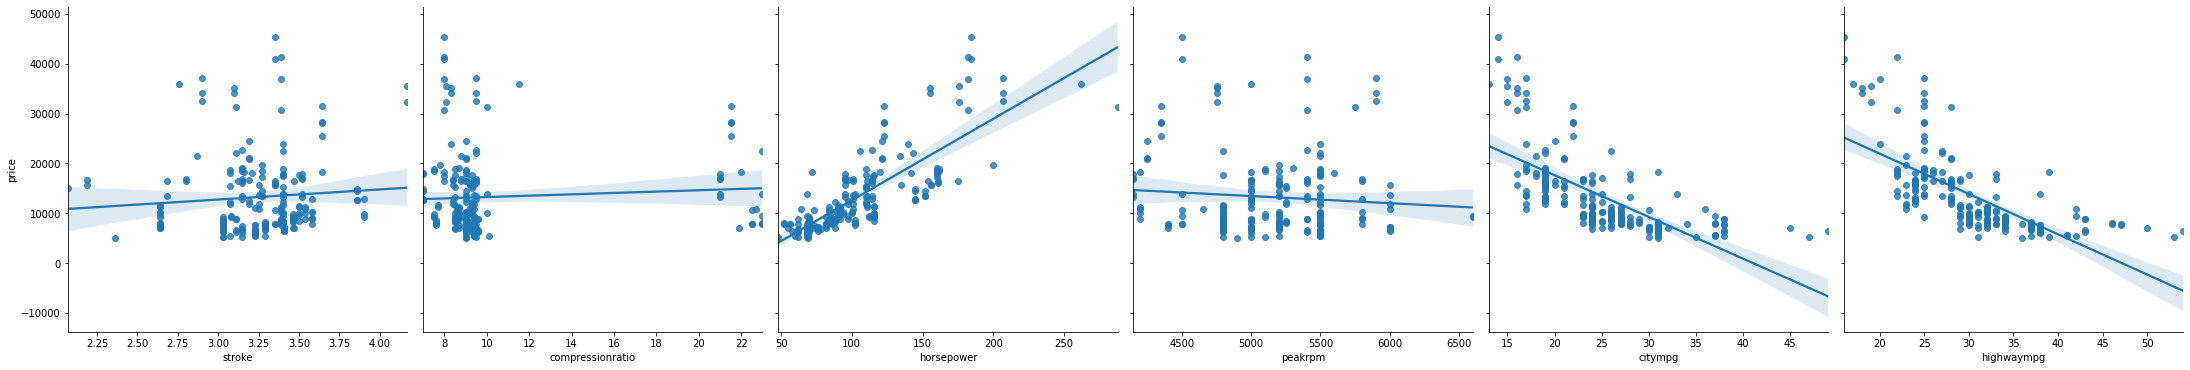

In [573]:
sns.pairplot(data = carprice_df, x_vars = num_vars[7:], y_vars = "price", kind  = "reg", height = 5)

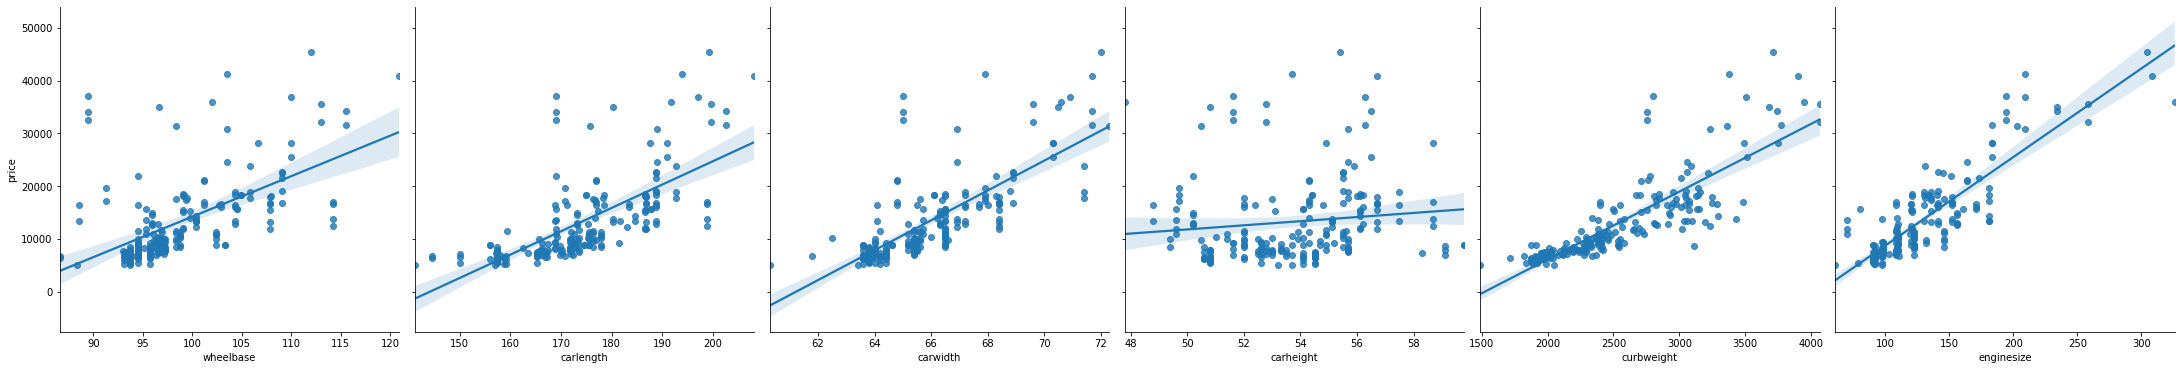

In [574]:
num_vars = list(carprice_df.select_dtypes(include = np.number).columns)
num_vars = num_vars[2:-1] #removing car_ID, symboling and price columns
sns.pairplot(data = carprice_df, x_vars = num_vars[:6], y_vars = "price", kind  = "reg", height = 5)
plt.show()

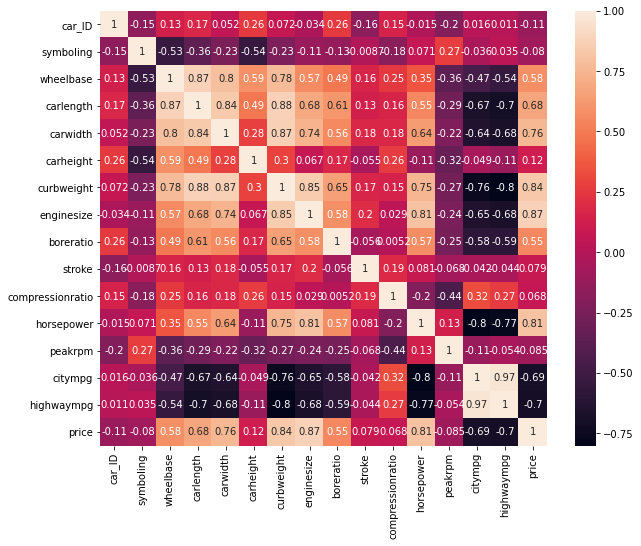

In [575]:
plt.figure(figsize = (10,8))
fig = sns.heatmap(carprice_df.corr(), annot = True )

plt.show()

## Encoding Categorical variables

In [0]:
carprice_df["symboling"] = carprice_df["symboling"].astype("object")

In [0]:
cols = list(carprice_df.select_dtypes(exclude = np.number).columns)
cols.remove("car_name")

In [578]:
carprice_df = pd.get_dummies(carprice_df, columns = cols)
carprice_df.head()

,car_ID,car_name,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,...,car_company_volkswagen,car_company_volvo,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2,stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,4,100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,5,100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
#Splitting the dataset
train_df, test_df = train_test_split(carprice_df.iloc[:,2:], train_size = 0.8, random_state = 42)

In [0]:
#Normalizing the training data
scaler = MinMaxScaler()
train_df.iloc[:,:] = scaler.fit_transform(train_df)

In [0]:
#Splitting into x and y train
y_train = train_df.pop("price")
x_train = train_df

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(x_train, y_train)

In [753]:
#y_pred = model.predict(x_train)
#r2_score(y_train, y_pred)

0.9680116864796846

In [0]:
from sklearn.feature_selection import RFE
rfe = RFE(model, 10).fit(x_train, y_train)

In [0]:
cols = list(x_train.columns[rfe.support_])
#cols.remove("compressionratio")
#cols.remove("enginelocation_front")

In [0]:
new_features.remove("drivewheel_rwd")

In [0]:
new_x_train = x_train[new_features]
new_x_train = sm.add_constant(new_x_train)

In [857]:
model2 = sm.OLS(y_train, new_x_train).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:               OLS              Adj. R-squared:     0.927    
Dependent Variable:  price            AIC:                -456.0577
Date:                2020-05-27 13:06 BIC:                -416.3265
No. Observations:    157              Log-Likelihood:     241.03   
Df Model:            12               F-statistic:        165.0    
Df Residuals:        144              Prob (F-statistic): 9.69e-78 
R-squared:           0.932            Scale:              0.0029620
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const                0.0825   0.0201  4.1030 0.0001  0.0428  0.1223
curbweight           0.4843   0.0305 15.8857 0.0000  0.4241  0.5446
car_company_audi     0.1264   0.0248  5.1042 0.0000  0.0774  0.1753
car_company_bmw      0.2414   0.0258  9.3553 0.0000  0.1904  0.2924
car_company_buick    0.2423   0.0326  7.4245 0.0000  0.1778  0.3068
car_company_porsche  0.3857   0.0401  9.6154 0.0000  0.3064  0.4650
car_company_saab     0.0937   0.0236  3.9643 0.0001  0.0470  0.1404
car_company_volvo    0.1298   0.0204  6.3647 0.0000  0.0895  0.1701
aspiration_turbo     0.0390   0.0137  2.8360 0.0052  0.0118  0.0661
carbody_convertible  0.1312   0.0283  4.6392 0.0000  0.0753  0.1871
carbody_wagon       -0.0427   0.0144 -2.9726 0.0035 -0.0711 -0.0143
enginelocation_rear  0.2862   0.0675  4.2378 0.0000  0.1527  0.4197
cylindernumber_four -0.0828   0.0155 -5.3522 0.0000 -0.1133 -0.0522
-------------------------------------------------------------------
Omnibus:               37.343       Durbin-Watson:          1.762  
Prob(Omnibus):         0.000        Jarque-Bera (JB):       100.581
Skew:                  0.941        Prob(JB):               0.000  
Kurtosis:              6.440        Condition No.:          23     
===================================================================

"""

In [858]:
vif_df = pd.DataFrame()
vif_df["features"] = new_x_train.columns
vif_df["vif"] = [variance_inflation_factor(new_x_train.values, i ) for i in range(new_x_train.shape[1])]
vif_df

,features,vif
0,const,21.447904
1,curbweight,2.432969
2,car_company_audi,1.194644
3,car_company_bmw,1.088032
4,car_company_buick,1.401998
5,car_company_porsche,1.598590
6,car_company_saab,1.087583
7,car_company_volvo,1.190747
8,aspiration_turbo,1.508065
9,carbody_convertible,1.052501


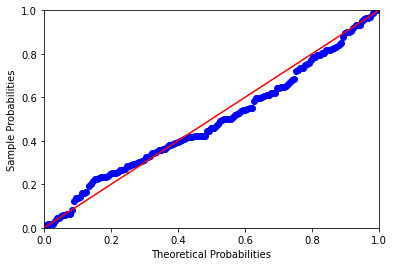

In [859]:
probplot = sm.ProbPlot(model2.resid)
probplot.ppplot(line = "45")
plt.show()

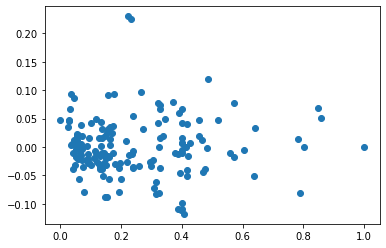

In [860]:
plt.scatter(x = model2.fittedvalues, y = model2.resid)

In [0]:
test_df.iloc[:,:] = scaler.transform(test_df)

In [0]:
#y_test = test_df.pop("price")
x_test = test_df[new_features]
x_test = sm.add_constant(x_test)

In [867]:
y_pred = model2.predict(x_test)
r2_score(y_test, y_pred)

0.901670121972224

### Outlier Analysis

<StemContainer object of 3 artists>

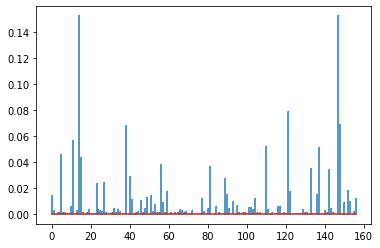

In [871]:
import warnings
warnings.filterwarnings("ignore")
influence = model2.get_influence()
c,p = influence.cooks_distance

plt.stem(np.arange(len(x_train)), c, markerfmt = ",")

In [0]:
from scipy.stats import zscore

In [870]:
#carprice_df.drop(index = 
carprice_df[abs(zscore(carprice_df["price"]))>3]
#.index, inplace = True)

,car_ID,car_name,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,...,car_company_volkswagen,car_company_volvo,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
47,48,xj,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176,4750,15,19,32250.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
70,71,skyhawk,115.6,202.6,71.7,56.3,3770,183,3.58,3.64,21.5,123,4350,22,25,31600.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
71,72,opel isuzu deluxe,115.6,202.6,71.7,56.5,3740,234,3.46,3.10,8.3,155,4750,16,18,34184.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
126,127,panamera,89.5,168.9,65.0,51.6,2756,194,3.74,2.90,9.5,207,5900,17,25,32528.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
127,128,cayenne,89.5,168.9,65.0,51.6,2756,194,3.74,2.90,9.5,207,5900,17,25,34028.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
129,130,cayenne,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,288,5750,17,28,31400.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
from sklearn.linear_model import Lasso

In [0]:
model3 = Lasso(alpha = 0.001)
model3 =  model3.fit(x_train, y_train)

In [781]:
y_pred = model3.predict(x_train)
r2_score(y_train, y_pred)

0.9332541137436057

In [0]:
list(zip(x_train.columns,list(model3.coef_)))
coe = pd.DataFrame()
coe["features"] = x_train.columns
coe["coef"] = model3.coef_

In [0]:
coe = coe[coe["coef"]!= 0]

In [0]:
new_features = list(coe.features)